In [2]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [10]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
print('Shapes X, y:', X.shape, y.shape)

Shapes X, y: (150, 4) (150,)


Normalize the dataset

In [11]:
from sklearn.preprocessing import minmax_scale

X_s = minmax_scale(X, feature_range=(0, 1), axis=0)
X_s

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

Train Test split

*stratify=y* -> specify the stratify parameter in order to create balanced distribution regarding labels percentages

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

Define MLP Classifier

In [14]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', learning_rate='constant', learning_rate_init=0.01, max_iter=200, shuffle=True, random_state=42, tol=0.0001)

In [24]:
mlp.fit(X_train, y_train)

c:\Users\fmna\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10,), learning_rate_init=0.01,
              random_state=42)

In [20]:
y_pred = mlp.predict(X_test)
y_pred - y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
mlp.score(X_test, y_test)

1.0

In [25]:
mlp.predict_proba(X_test)

array([[0.88562542, 0.10779745, 0.00657714],
       [0.10192554, 0.59099321, 0.30708125],
       [0.84530793, 0.14434245, 0.01034962],
       [0.03246268, 0.47052753, 0.49700979],
       [0.87961797, 0.11327668, 0.00710535],
       [0.12015838, 0.61402877, 0.26581286],
       [0.013114  , 0.34244594, 0.64444006],
       [0.88618949, 0.107268  , 0.00654251],
       [0.87392316, 0.11847861, 0.00759823],
       [0.20733316, 0.62802322, 0.16464362],
       [0.00543387, 0.23695627, 0.75760985],
       [0.1468986 , 0.60226763, 0.25083376],
       [0.05082863, 0.51632791, 0.43284345],
       [0.00810231, 0.28238372, 0.70951398],
       [0.18804467, 0.61431384, 0.19764149],
       [0.01887348, 0.40887893, 0.57224759],
       [0.01466674, 0.3926184 , 0.59271486],
       [0.07951886, 0.54371925, 0.37676188],
       [0.06377993, 0.50952048, 0.42669959],
       [0.89944538, 0.09506553, 0.00548909],
       [0.88858558, 0.10504269, 0.00637173],
       [0.02027148, 0.41600253, 0.56372599],
       [0.

MLP model loss curve

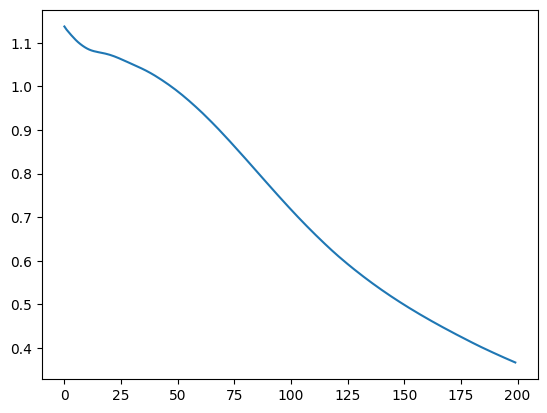

In [27]:
plt.plot(mlp.loss_curve_)